In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#load dataset
tips = sns.load_dataset('tips')

In [112]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [113]:
#Prepare data: feature matrix X and target y
#Fit linear regression model (ordinary least squares)
X = tips[['total_bill']] #independent variable(s)
y = tips['tip'] #dependent variable

#Fit linear regression model (ordinary least squares)
model = LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [114]:
y_pred = model.predict(X)

In [115]:
#Coefficients of the fitted line
m = model.coef_[0]
b = model.intercept_
print(f"Fitted line: y={m:.3f}x+{b:.3f}")

Fitted line: y=0.105x+0.920


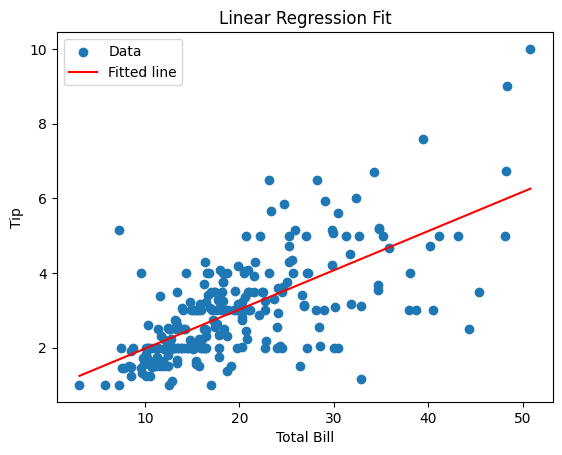

In [116]:
#Plot data and fitted line
plt.scatter(tips['total_bill'],tips['tip'],label= 'Data')
x_vals = np.linspace(tips['total_bill'].min(),tips['total_bill'].max(),100)
plt.plot(x_vals,m*x_vals+b,color='red',label='Fitted line')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

In [117]:
#Variables
x = tips['total_bill']
y=tips['tip']

#Means 
x_mean = np.mean(x)
y_mean = np.mean(y)

#Numerator & denominator for beta_1 (slope)
numerator = np.sum((x-x_mean)*(y-y_mean))
denominator = np.sum((x-x_mean)**2)

beta1 = numerator/denominator #slope
beta0 = y_mean-beta1*x_mean #intercept

#Print fitted line equation
print(f"Fitted line: y={beta1:.3f}x+{beta0:.3f}")


Fitted line: y=0.105x+0.920


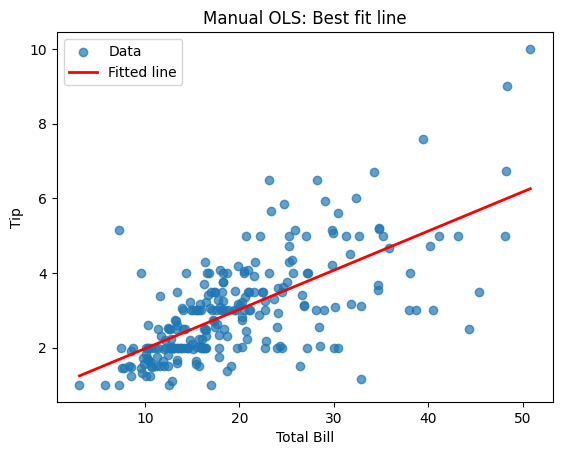

In [118]:
#Create smooth x values for line
x_vals = np.linspace(x.min(),x.max(),100)
y_vals = beta0+beta1*x_vals

#Plot
plt.scatter(x,y,label='Data',alpha=0.7)
plt.plot(x_vals,y_vals,color='red',label='Fitted line',linewidth=2)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Manual OLS: Best fit line')
plt.legend()
plt.show()

In [119]:
#Blank

In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae = mean_absolute_error(y,y_pred)
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y,y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE):{mse:.4f}')
print(f'Root Mean Squared Error (RMSE):{rmse:.4f}')
print(f'R-squared (R2):{r2:.4f}')

Mean Absolute Error (MAE): 0.7458
Mean Squared Error (MSE):1.0360
Root Mean Squared Error (RMSE):1.0179
R-squared (R2):0.4566


In [121]:
x=tips['total_bill'].values #ndarray
y=tips['tip'].values
n=len(y)

#Gradient descent settings
alpha = 0.001 #learning rate
iterations = 10000 #number of steps

#Initial guesses for m and b
m=0.0
b=0.0

#Gradient Descent loop
for _ in range(iterations):
    y_pred = m*x+b
    error = y_pred-y
    #Partial derivatives
    dm = (-2/n)*np.sum(x*(y-y_pred))
    db = (-2/n)*np.sum(y-y_pred)

    #Update parameters
    m=m-alpha*dm
    b = b-alpha*db

print(f"Fitted line (Gradient Descent): y={m:.3f}x+{b:.3f}")

Fitted line (Gradient Descent): y=0.106x+0.888


In [122]:
#Create smooth x values for fitted line
x_vals = np.linspace(x.min(),x.max(),100)
y_vals = m*x_vals+b

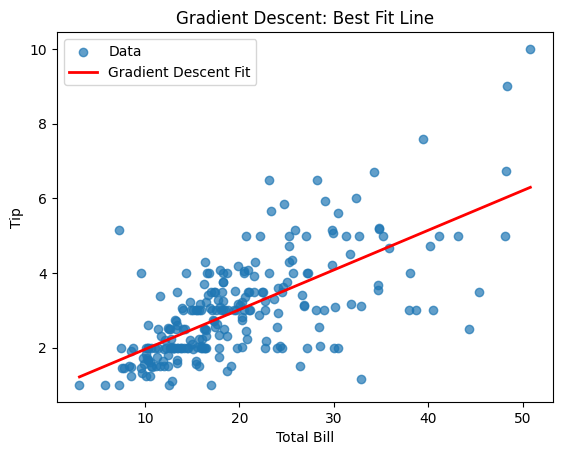

In [123]:
#Plot
plt.scatter(x,y,label='Data',alpha=0.7)
plt.plot(x_vals,y_vals,color='red',label='Gradient Descent Fit',linewidth=2)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Gradient Descent: Best Fit Line')
plt.legend()
plt.show()

In [147]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#Load Dataset
penguins = sns.load_dataset('penguins').dropna()

In [125]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [126]:
#Features and target
X=penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm']]
y = penguins['body_mass_g']

In [127]:
#initialize and fit model
model = LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [128]:
#Predictions
y_pred = model.predict(X)

In [129]:
#Evaluate model
r2 = r2_score(y,y_pred)
print(f"R^2 score:{r2:.3f}")

R^2 score:0.764


In [130]:
#Coefficients
coef_df = pd.DataFrame({'Feature':X.columns, 'Coefficient':model.coef_})
print(coef_df)

             Feature  Coefficient
0     bill_length_mm     3.292863
1      bill_depth_mm    17.836391
2  flipper_length_mm    50.762132


In [131]:
#New data for prediction (example values)
#Make sure to provide values in the same order and scale as training features
new_data = pd.DataFrame({'bill_length_mm':[45.0],'bill_depth_mm':[15.0],'flipper_length_mm':[210.0]})

In [132]:
#Predicted body mass for new data
new_pred = model.predict(new_data)
print(f"Predicted body mass for new input: {new_pred.round(2)} grams")

Predicted body mass for new input: [4630.3] grams


In [133]:
#Predicted values
y_pred = model.predict(X)

#Residuals 
residuals = y-y_pred

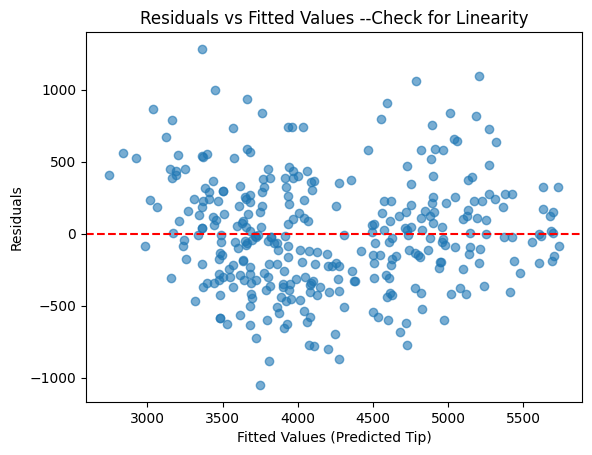

In [134]:
#Plot residuals vs fitted lines
plt.scatter(y_pred,residuals,alpha=0.6)
plt.axhline(0,color='red',linestyle='--')
plt.xlabel('Fitted Values (Predicted Tip)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values --Check for Linearity')
plt.show()

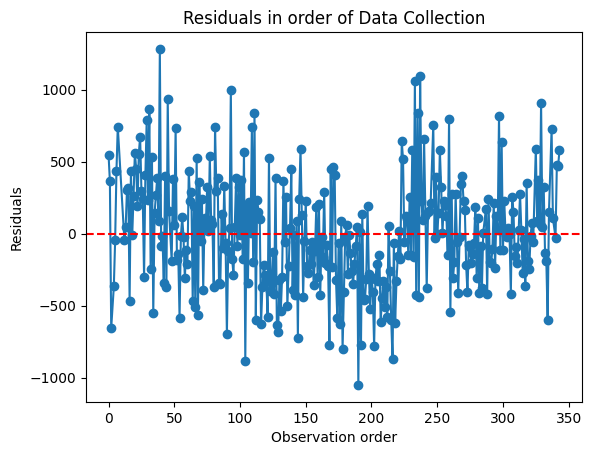

In [135]:
plt.plot(residuals,marker = 'o')
plt.axhline(0,color='red',linestyle='--')
plt.xlabel('Observation order')
plt.ylabel('Residuals')
plt.title('Residuals in order of Data Collection')
plt.show()

In [136]:
#Durbin Watson

In [137]:
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
X_sm = sm.add_constant(X) # add intercept for statmodels
sm_model = sm.OLS(y,X_sm).fit()
d = durbin_watson(sm_model.resid)
print(f'Durbin-Watson statistic:{d:.3f}')

Durbin-Watson statistic:1.968


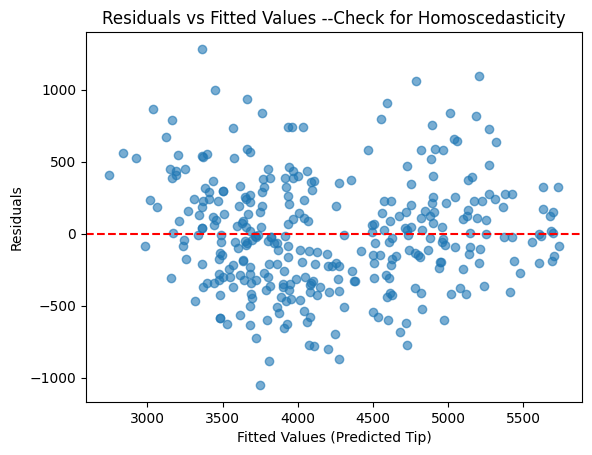

In [138]:
plt.scatter(y_pred,residuals,alpha=0.6)
plt.axhline(0,color='red',linestyle='--')
plt.xlabel('Fitted Values (Predicted Tip)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values --Check for Homoscedasticity')
plt.show()

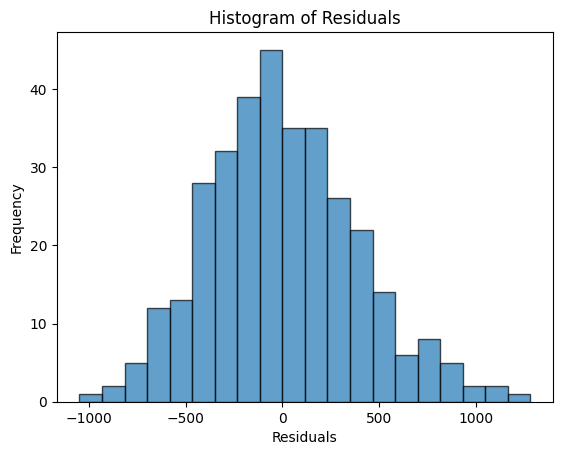

In [139]:
plt.hist(residuals,bins=20,edgecolor='black',alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

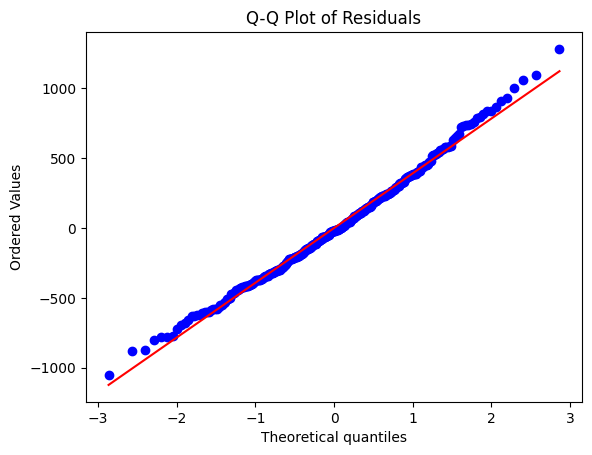

In [140]:
import scipy.stats as stats
stats.probplot(residuals,dist='norm',plot =plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [141]:
#Cooks distance

In [148]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [149]:
#Prepare data for statsmodels

In [150]:
X_sm = sm.add_constant(X) #add intercept
sm_model = sm.OLS(y,X_sm).fit()

In [152]:
#Get Influence measures
influence = sm_model.get_influence()
cooks_d,_ = influence.cooks_distance

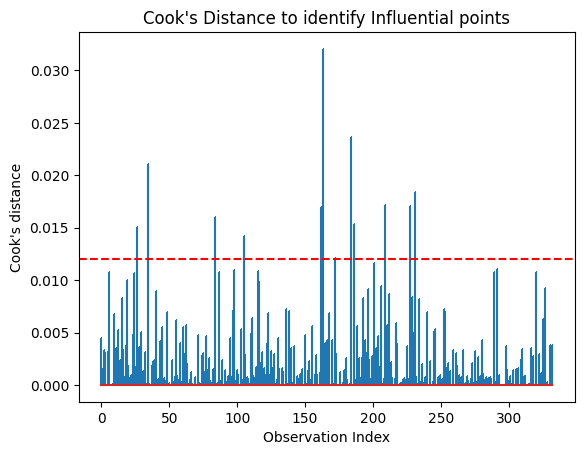

In [153]:
plt.stem(np.arange(len(cooks_d)),cooks_d,markerfmt=',')
plt.axhline(4/len(cooks_d),color='red',linestyle='--')
plt.xlabel('Observation Index')
plt.ylabel("Cook's distance")
plt.title("Cook's Distance to identify Influential points")
plt.show()

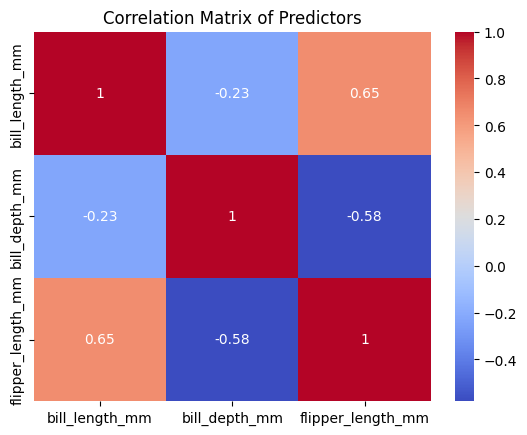

In [154]:
penguins =  sns.load_dataset('penguins').dropna()
X=penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm']]
corr_matrix = X.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix of Predictors')
plt.show()

In [157]:
#VIF Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_with_const = sm.add_constant(X)

vif_data =  pd.DataFrame()
vif_data['feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values,i) for i in range(X_with_const.shape[1])]
print(vif_data)

             feature         VIF
0              const  691.005294
1     bill_length_mm    1.850958
2      bill_depth_mm    1.593411
3  flipper_length_mm    2.633327
